The purpose of this notebook is to explore the effects of winsorization on CO2 emissions data. In so doing, we aim to smooth the CAMPD emissions data to achieve better fits with the synthetic control method.

In [67]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv(os.path.join("..","SharedData","total_state_data.csv"))

In [69]:
# Some useful definitions
states = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]

In [70]:
# Clean up the data a bit
df = df[(df.year>=1991)&(df.year<2010)]
df = df[df.state.isin(states)]
df.date = pd.to_datetime(df.date)
df

,state,state_sq_ft,year,month,date,monthly_population,yearly_population,monthly_pop_density,yearly_pop_density,monthly_emissions,...,monthly_energy_total,yearly_energy_total,monthly_energy_renew,yearly_energy_renew,monthly_renew_pct,yearly_renew_pct,monthly_energy_fossil,yearly_energy_fossil,monthly_fossil_pct,yearly_fossil_pct
588,AL,52423.0,1991,1,1991-01-01,4078697.25,4099156.0,0.012853,0.012789,5.063446e+06,...,6.701112e+06,88786612.0,866592.361111,10757723.0,0.129321,0.121164,4.601384e+06,59613166.0,0.686660,0.671421
589,AL,52423.0,1991,2,1991-02-01,4082789.00,4099156.0,0.012840,0.012789,4.394083e+06,...,6.764546e+06,88786612.0,869309.138889,10757723.0,0.128510,0.121164,4.634691e+06,59613166.0,0.685144,0.671421
590,AL,52423.0,1991,3,1991-03-01,4086880.75,4099156.0,0.012827,0.012789,4.491533e+06,...,6.827979e+06,88786612.0,872025.916667,10757723.0,0.127714,0.121164,4.667998e+06,59613166.0,0.683657,0.671421
591,AL,52423.0,1991,4,1991-04-01,4090972.50,4099156.0,0.012814,0.012789,4.125696e+06,...,6.891413e+06,88786612.0,874742.694444,10757723.0,0.126932,0.121164,4.701306e+06,59613166.0,0.682198,0.671421
592,AL,52423.0,1991,5,1991-05-01,4095064.25,4099156.0,0.012802,0.012789,4.979513e+06,...,6.954847e+06,88786612.0,877459.472222,10757723.0,0.126165,0.121164,4.734613e+06,59613166.0,0.680764,0.671421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11755,WY,97818.0,2009,8,2009-08-01,560609.50,559851.0,0.174485,0.174721,4.135451e+06,...,3.848858e+06,46029212.0,227315.861111,3192777.0,0.059061,0.069364,3.592543e+06,42492461.0,0.933405,0.923163
11756,WY,97818.0,2009,9,2009-09-01,560988.75,559851.0,0.174367,0.174721,4.016860e+06,...,3.845585e+06,46029212.0,237003.083333,3192777.0,0.061630,0.069364,3.579666e+06,42492461.0,0.930851,0.923163
11757,WY,97818.0,2009,10,2009-10-01,561368.00,559851.0,0.174249,0.174721,4.479087e+06,...,3.842313e+06,46029212.0,246690.305556,3192777.0,0.064204,0.069364,3.566790e+06,42492461.0,0.928293,0.923163
11758,WY,97818.0,2009,11,2009-11-01,561747.25,559851.0,0.174132,0.174721,4.374977e+06,...,3.839040e+06,46029212.0,256377.527778,3192777.0,0.066782,0.069364,3.553914e+06,42492461.0,0.925730,0.923163


In [71]:
# Do per-capita calculations
df["monthly_emissions_per_capita"] = df.monthly_emissions / df.monthly_population
df["monthly_emissions_per_capita_per_area"] = df.monthly_emissions / df.monthly_population / (df.monthly_population / df.monthly_pop_density)
df[["state", "date", "monthly_emissions_per_capita", "monthly_emissions_per_capita_per_area"]]

,state,date,monthly_emissions_per_capita,monthly_emissions_per_capita_per_area
588,AL,1991-01-01,1.241437,3.912043e-09
589,AL,1991-02-01,1.076246,3.384694e-09
590,AL,1991-03-01,1.099012,3.449376e-09
591,AL,1991-04-01,1.008488,3.158926e-09
592,AL,1991-05-01,1.215979,3.801251e-09
...,...,...,...,...
11755,WY,2009-08-01,7.376705,2.295939e-06
11756,WY,2009-09-01,7.160321,2.225579e-06
11757,WY,2009-10-01,7.978879,2.476654e-06
11758,WY,2009-11-01,7.788159,2.414191e-06


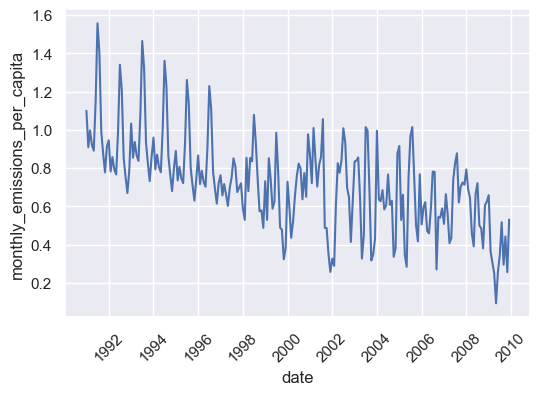

In [72]:
# Here's what delware looks like before winsorization:
de_df = df[df.state=="DE"].copy(deep=True)
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (6,4))
sns.lineplot(data=de_df, x="date", y="monthly_emissions_per_capita")
#plt.xticks(df['date'].dt.strftime("%Y")[::12])
#ax.set_xticks(len(de_df.year.values.unique()), rotation="45")
#ax.set_xticklabels(labels=df['date'].dt.strftime("%Y")[::12], rotation=45, ha='right')
plt.xticks(rotation=45)
plt.show()

In [73]:
# Now do basic winsorization:
from scipy.stats.mstats import winsorize
de_df["monthly_emissions_per_capita_winsorized"] = de_df.monthly_emissions_per_capita
winsorize(de_df.monthly_emissions_per_capita_winsorized, limits=(0.05, 0.05))

masked_array(data=[1.09978375, 0.90952103, 0.99696398, 0.92140145,
                   0.89095332, 1.13655698, 1.13655698, 1.13655698,
                   0.99002474, 0.87817554, 0.77783713, 0.91201575,
                   0.94556918, 0.78216649, 0.85756308, 0.79274833,
                   0.76672729, 0.99027908, 1.13655698, 1.13655698,
                   0.85236221, 0.75611923, 0.66977408, 0.78536699,
                   1.03279703, 0.85438054, 0.93680369, 0.86606033,
                   0.83769119, 1.08200871, 1.13655698, 1.13655698,
                   0.93147246, 0.82634273, 0.73201891, 0.85840171,
                   0.95950308, 0.79379175, 0.87041748, 0.80473126,
                   0.77841344, 1.00549687, 1.13655698, 1.13655698,
                   0.86535155, 0.76760984, 0.6799242 , 0.79723574,
                   0.88932372, 0.73566196, 0.80659896, 0.74565746,
                   0.72120275, 0.93150768, 1.13655698, 1.13655698,
                   0.80199038, 0.71149813, 0.63030424, 0.73915

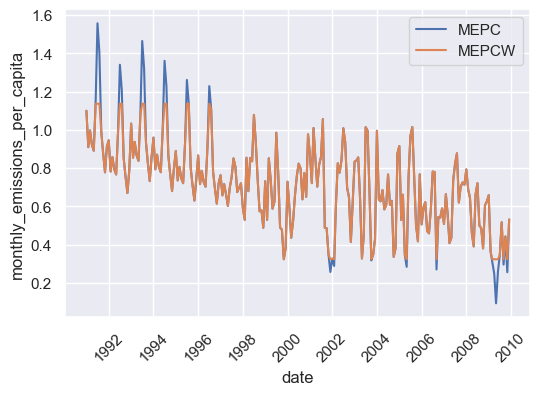

In [74]:
# And after winsorization:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (6,4))
sns.lineplot(data=de_df, x="date", y="monthly_emissions_per_capita", label="MEPC")
sns.lineplot(data=de_df, x="date", y="monthly_emissions_per_capita_winsorized", label="MEPCW")
plt.xticks(rotation=45)
plt.show()

This approach clearly introduces a problem! Because our time series has a trend, more values are removed at the ends of the series than the middle. To remedy this, let's look at the differences between the time steps rather than the overall emssions.

In [75]:
de_df["monthly_emissions_per_capita_diff"] = de_df.monthly_emissions_per_capita.diff()

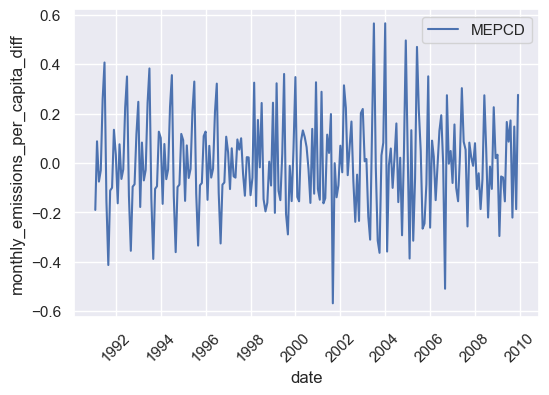

In [76]:
# Here are the differences without winsorization:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (6,4))
sns.lineplot(data=de_df, x="date", y="monthly_emissions_per_capita_diff", label="MEPCD")
plt.xticks(rotation=45)
plt.show()

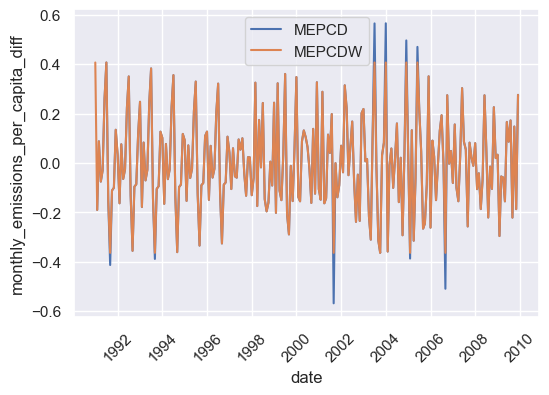

In [77]:
# And the differences with:
de_df["monthly_emissions_per_capita_diff_winsorized"] = de_df.monthly_emissions_per_capita_diff
winsorize(de_df.monthly_emissions_per_capita_diff_winsorized, limits=(0.025, 0.025))
fig, ax = plt.subplots(figsize = (6,4))
sns.lineplot(data=de_df, x="date", y="monthly_emissions_per_capita_diff", label="MEPCD")
sns.lineplot(data=de_df, x="date", y="monthly_emissions_per_capita_diff_winsorized", label="MEPCDW")
plt.xticks(rotation=45)
plt.show()

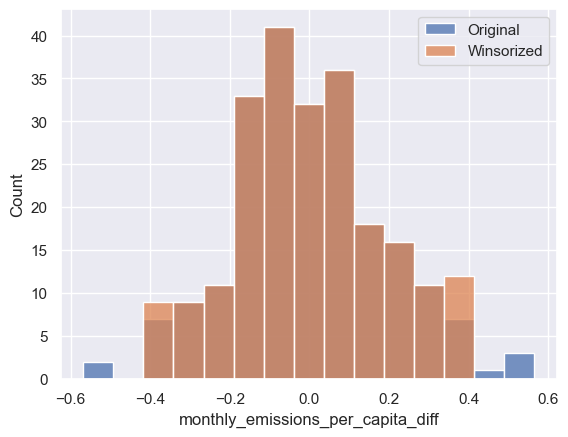

In [78]:
# Lets get a better sense for the shape of this data using a histogram
ax1 = sns.histplot(data=de_df, x="monthly_emissions_per_capita_diff", label="Original")
bin_edges = [patch.get_x() for patch in ax1.patches]
bin_edges.append(bin_edges[-1] + ax1.patches[-1].get_width())
ax2 = sns.histplot(data=de_df, x="monthly_emissions_per_capita_diff_winsorized", bins = bin_edges, label="Winsorized")
plt.legend()
plt.show()

In [79]:
de_df.monthly_emissions_per_capita_diff.mean()

np.float64(-0.002504064624185552)

In [80]:
check_df = de_df[["date", "monthly_emissions_per_capita", "monthly_emissions_per_capita_diff", "monthly_emissions_per_capita_diff_winsorized"]]
check_df.head()

,date,monthly_emissions_per_capita,monthly_emissions_per_capita_diff,monthly_emissions_per_capita_diff_winsorized
672,1991-01-01,1.099784,NaN,0.406459
673,1991-02-01,0.909521,-0.190263,-0.190263
674,1991-03-01,0.996964,0.087443,0.087443
675,1991-04-01,0.921401,-0.075563,-0.075563
676,1991-05-01,0.890953,-0.030448,-0.030448


Clearly, a better estimate of the trend is necessary in order for winsorization to work. Two ideas come to mind:
1. Perform a simple linear fit to establish a trend, then apply winsorization to the residuals.
2. Calculate the moving average, then apply winsorization to the residuals.

Option 1 sounds better if we can trust that the pre-treatment trend is linear. However, I'm not sure this is reasonable. In any case, I'll try both and see what happens.

In [81]:
de_df["monthly_emissions_per_capita_moving_average"] = de_df.monthly_emissions_per_capita.rolling(window=12).mean()

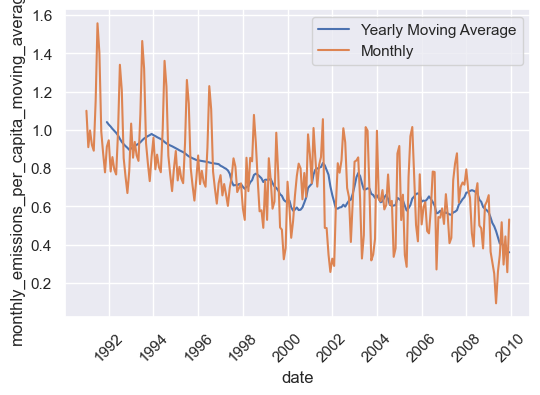

In [84]:
fig, ax = plt.subplots(figsize = (6,4))
sns.lineplot(data=de_df, x="date", y="monthly_emissions_per_capita_moving_average", label="Yearly Moving Average")
sns.lineplot(data=de_df, x="date", y="monthly_emissions_per_capita", label="Monthly")
plt.xticks(rotation=45)
plt.show()

In [85]:
# Calculate residuals
de_df["monthly_emissions_per_capita_moving_average_residuals"] = de_df.monthly_emissions_per_capita - de_df.monthly_emissions_per_capita_moving_average

In [87]:
# And winsorize
de_df["monthly_emissions_per_capita_moving_average_residuals_winsorized"] = de_df.monthly_emissions_per_capita_moving_average_residuals
winsorize(de_df.monthly_emissions_per_capita_moving_average_residuals_winsorized, limits=(0.025, 0.025))

masked_array(data=[        nan,         nan,         nan,         nan,
                           nan,         nan,         nan,         nan,
                           nan,         nan,         nan, -0.12859417,
                   -0.08218953, -0.23497934, -0.14796601, -0.20205967,
                   -0.21772853,  0.01917186,  0.38719097,  0.27126668,
                   -0.07294908, -0.1590207 , -0.23636059, -0.11021362,
                    0.12994743, -0.0544869 ,  0.02133287, -0.05551982,
                   -0.08980262,  0.14687077,  0.51897976,  0.3652713 ,
                   -0.02994783, -0.14092951, -0.2404404 , -0.12014383,
                   -0.01293463, -0.17359689, -0.09143898, -0.15201444,
                   -0.17339245,  0.06006697,  0.42399085,  0.29752091,
                   -0.05812842, -0.15097573, -0.23432014, -0.11191143,
                   -0.01397517, -0.16279278, -0.08653757, -0.14255625,
                   -0.16224341,  0.05422729,  0.39186327,  0.27510332,
      

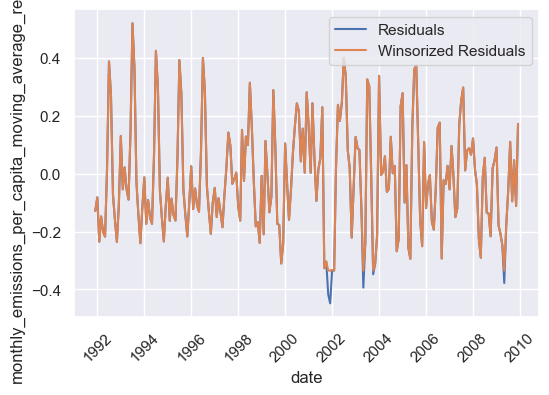

In [88]:
fig, ax = plt.subplots(figsize = (6,4))
sns.lineplot(data=de_df, x="date", y="monthly_emissions_per_capita_moving_average_residuals", label="Residuals")
sns.lineplot(data=de_df, x="date", y="monthly_emissions_per_capita_moving_average_residuals_winsorized", label="Winsorized Residuals")
plt.xticks(rotation=45)
plt.show()

In [100]:
de_df["time_elapsed"] = (de_df.date - df.date.values[0]).dt.days
de_df.time_elapsed

672         0
673        31
674        59
675        90
676       120
         ... 
11263    6787
11264    6818
11265    6848
11266    6879
11267    6909
Name: time_elapsed, Length: 228, dtype: int64

In [102]:
# Now let's check against a simple linear fit
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(de_df[["time_elapsed"]], de_df.monthly_emissions_per_capita)

X_plot = de_df[["time_elapsed"]]
y_plot = slr.predict(X_plot)

de_df["monthly_emissions_per_capita_slr_residuals"] = de_df.monthly_emissions_per_capita - y_plot

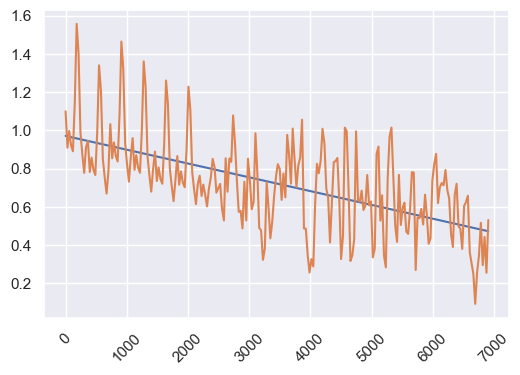

In [103]:
fig, ax = plt.subplots(figsize = (6,4))
plt.plot(X_plot, y_plot, label="Fit")
plt.plot(de_df.time_elapsed, de_df.monthly_emissions_per_capita)
plt.xticks(rotation=45)
plt.show()

In [104]:
de_df["monthly_emissions_per_capita_slr_residuals_winsorized"] = de_df.monthly_emissions_per_capita_slr_residuals
winsorize(de_df.monthly_emissions_per_capita_slr_residuals_winsorized, limits=(0.025, 0.025))

masked_array(data=[ 0.1285784 , -0.05944901,  0.03001293, -0.0433143 ,
                   -0.07159923,  0.1901451 ,  0.41689025,  0.41689025,
                    0.0363413 , -0.0733447 , -0.17144781, -0.03510599,
                    0.00068274, -0.16048464, -0.08299696, -0.14557641,
                   -0.16943424,  0.05635285,  0.40847847,  0.27852211,
                   -0.07493021, -0.16900999, -0.25311983, -0.13536373,
                    0.11430161, -0.06187957,  0.02256257, -0.04594549,
                   -0.07215143,  0.1744014 ,  0.41689025,  0.41689025,
                    0.03049895, -0.07246758, -0.1645561 , -0.0360101 ,
                    0.06732658, -0.09614945, -0.01750473, -0.08095565,
                   -0.10511027,  0.12420847,  0.41689025,  0.34962106,
                   -0.00930305, -0.10488156, -0.1903319 , -0.07085716,
                    0.02346613, -0.12796032, -0.05500434, -0.11371053,
                   -0.13600205,  0.07653819,  0.4080068 ,  0.28598599,
      

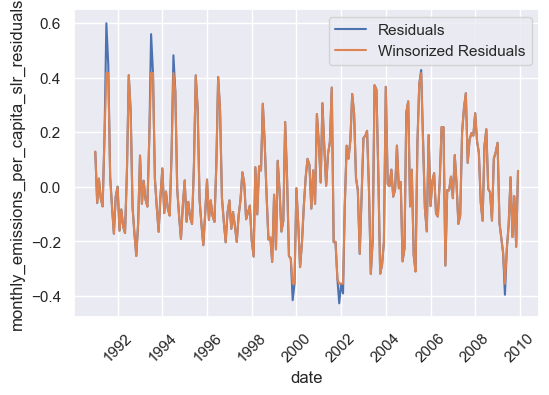

In [105]:
fig, ax = plt.subplots(figsize = (6,4))
sns.lineplot(data=de_df, x="date", y="monthly_emissions_per_capita_slr_residuals", label="Residuals")
sns.lineplot(data=de_df, x="date", y="monthly_emissions_per_capita_slr_residuals_winsorized", label="Winsorized Residuals")
plt.xticks(rotation=45)
plt.show()

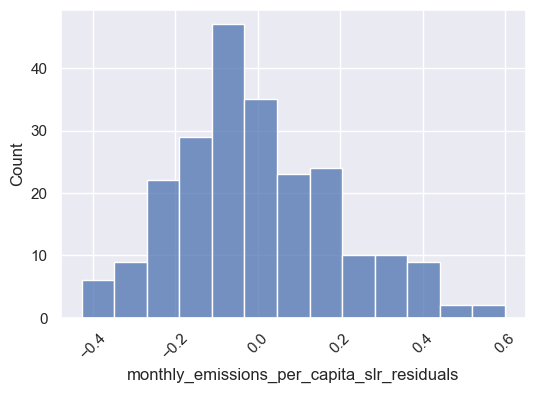

In [106]:
fig, ax = plt.subplots(figsize = (6,4))
sns.histplot(data=de_df, x="monthly_emissions_per_capita_slr_residuals")
plt.xticks(rotation=45)
plt.show()

From the histogram of residuals for the linear fit, there's a distinct skew. This demonstrates that the linear fit is not quite appropriate here, and this is borne out in the residuals plot above where we disproportionately remove some of the spikes in the early time period where the fit is poorest.